## Πανεπιστήμιο Δυτικής Αττικής
## Τμήμα Βιομηχανικής Σχεδίασης και Παραγωγής

### NIKO GARRO

<br>
<br>

#  Γραμμική Παλινδρόμηση

# Δεδομένα Car-mpg

Τα δεδομένα αφορούν την κατανάλωση καυσίμου κύκλου πόλης σε μίλια ανά γαλόνι, η οποία προβλέπεται να υπολογιστεί με βάση 3  χαρακτηριστικά με διακριτές τιμές και 5 χαρακτηριστικά με συνεχείς τιμές.

- mpg: μίλια ανά γαλόνι καυσίμου (1 γαλόνι= 3.78 λίτρα)
- cylinders: αριθμός κυλίνδρων
- displacement: όγκος κύλινδρου 
- horsepower: ιπποδύναμη
- weight: βάρος
- acceleration: επιτάχυνση
- model year: έτος παραγωγής
- origin: χώρα προέλευσης
- car name: εταρία παραγωγής και μοντέλο αυτοκινήτου

<br>
<br>

### **Προετοιμασία με φόρτωση  απαραίτητων βιβλιοθηκών**

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data=pd.read_csv('data/auto-mpg.csv')

### Πληροφορίες δεδομένων

Μελετήστε τα δεδομένα βρίσκοντας: 
- διαστάσεις
- όνομα, τύπο, πλήθος χαρακτηριστικών 
- πλήθος δειγμάτων και στατιστικά στοιχεία αυτών
- καταμέτρηση δειγμάτων για κάθε χαρακτηριστικό
- μοναδικές τιμές για την κατηγορία στόχο (έξοδος)
- ύπαρξη τιμών που λείπουν, ΝaN (Not a Nummber,null),δείγματα με αδιευκρίνιστη τιμή, είτε μια τιμή που δεν μπορεί να αναπαρασταθεί. 
- επιλογή και αντιστοιχηση χαρακτηριστικών ως είσοδοι στη μεταβλητή X και της εξόδου στη μεταβλητή y

In [3]:
data.shape

(398, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 398 entries, 0 to 397

Data columns (total 9 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   mpg           398 non-null    float64

 1   cylinders     398 non-null    int64  

 2   displacement  398 non-null    float64

 3   horsepower    398 non-null    object 

 4   weight        398 non-null    int64  

 5   acceleration  398 non-null    float64

 6   model year    398 non-null    int64  

 7   origin        398 non-null    int64  

 8   car name      398 non-null    object 

dtypes: float64(3), int64(4), object(2)

memory usage: 28.1+ KB


### εξαγωγη μη αριθμητικων τιμων και αλλαγη του horsepower σε int  

In [5]:
data = data[data.horsepower != '?']
print('?' in data.horsepower)


False


In [6]:
data = data.astype({"horsepower": int})

In [8]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
data.horsepower.dtypes

dtype('int32')

In [10]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
data.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
car name        392
dtype: int64

In [13]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN


In [14]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [15]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=392)

In [16]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [17]:
cols=data.columns
for i in cols:
    print(i)
    print(data[i].unique())

mpg

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.

 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5

 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5

 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7

 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2

 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5

 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8

 44.3 43.4 36.4 44.6 33.8 32.7 23.7 32.4 26.6 25.8 23.5 39.1 39.  35.1

 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4 34.  38.

 44. ]

cylinders

[8 4 6 3 5]

displacement

[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.

 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.

 232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.   91.

  97.5  70.  120.   96.   98.  108.  155.   68.  114.  156.   76.   83.

  90.  231.

In [18]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [19]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [20]:
features = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration','model year','origin','car name']
target= ['mpg']

## **Μελέτη δεδομένων**

#### Ιστόγραμμα μεταβλητής εξόδου

C:\Users\NIKO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

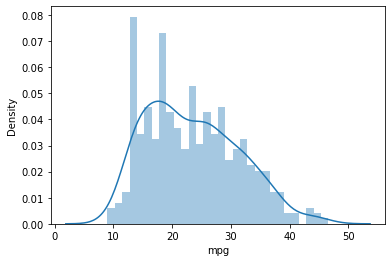

In [21]:
sns.distplot(data['mpg'], bins=30)

#### Ιστόγραμμα μεταβλητών εισόδου

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model year'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

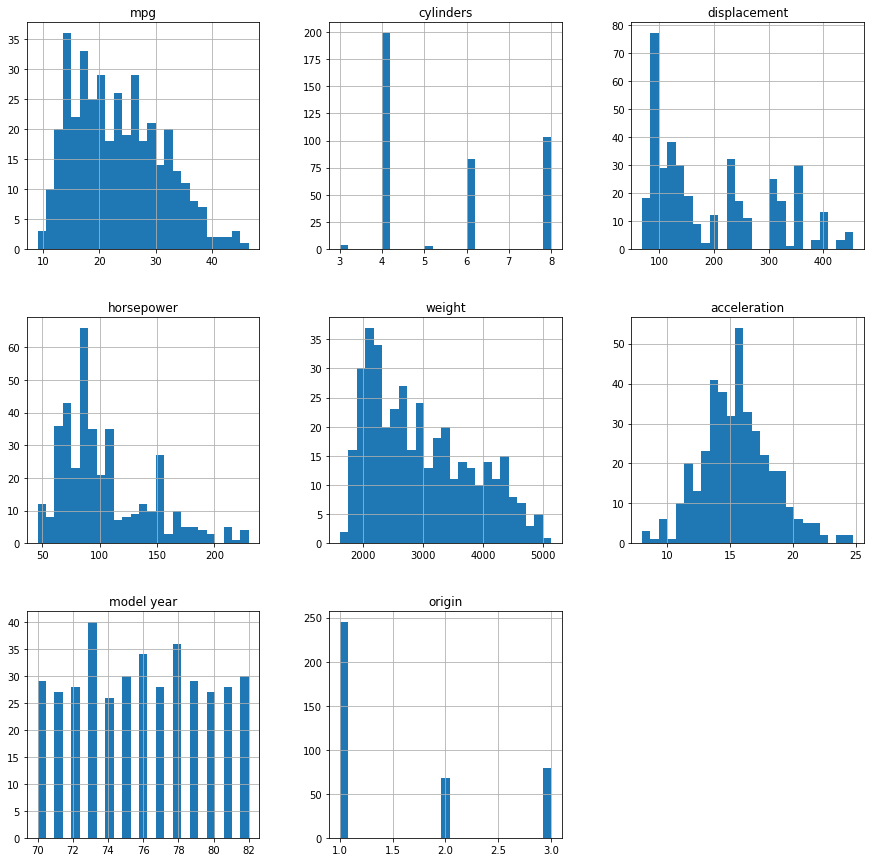

In [22]:
data.hist(bins=25, figsize=(15, 15))

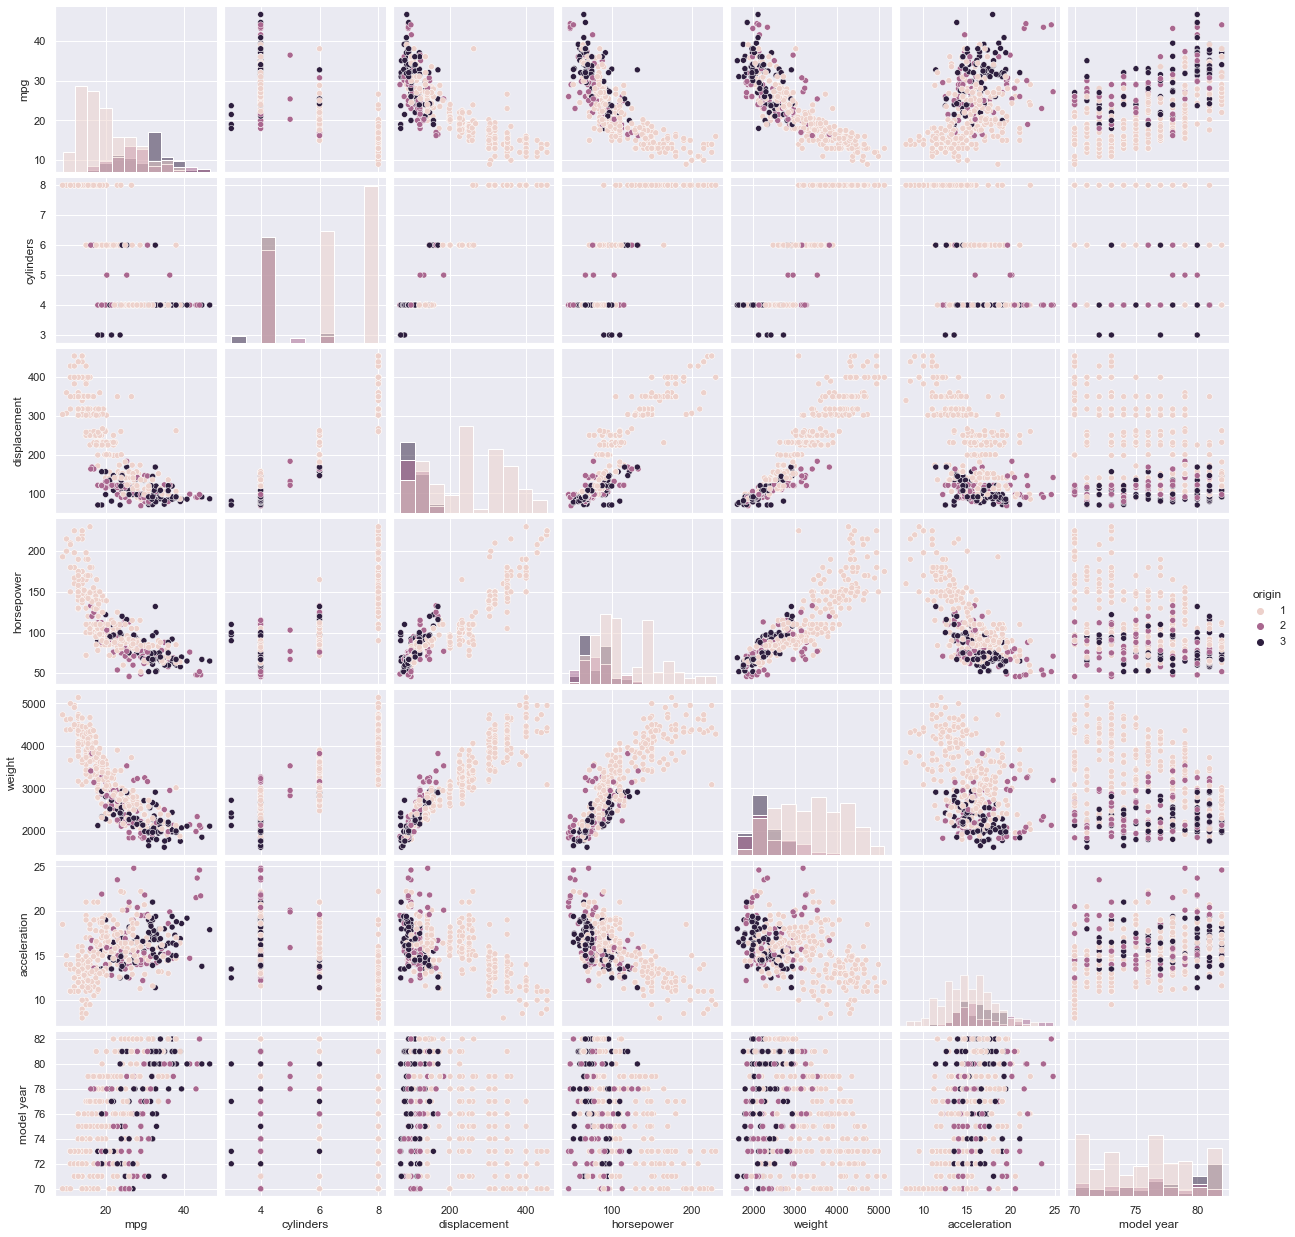

In [23]:
sns.set()
sns.pairplot(data,diag_kind='hist',hue ='origin')
plt.show()

### Πίνακας συσχέτισης για ζευγάρια χαρακτηριστικών 

<AxesSubplot:>

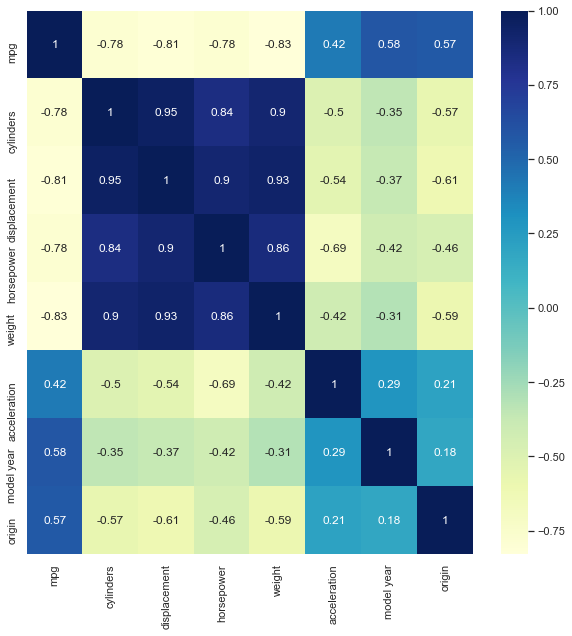

In [24]:
correlation_matrix = data.corr().round(2)
f, ax = plt.subplots(figsize=(10,10))
#### Χρήση απεικόνισης μορφής heatmap της βιβλιοθήκης seaborn 
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu')

## Διαχωρισμός σε δεδομένα εκπαίδευσης και δεδομένα ελέγχου

In [26]:
X=data[['cylinders', 'displacement', 'horsepower','weight','acceleration','model year','origin']]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [27]:
X.shape

(392, 7)

In [28]:
y=data.mpg
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [29]:
y.shape

(392,)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=19)

In [31]:
print("X_train διαστάσεις:", X_train.shape)
print("y_train διαστάσεις:", y_train.shape)

print("X_test διαστάσεις:", X_test.shape)
print("y_test διαστάσεις:", y_test.shape)

X_train διαστάσεις: (274, 7)

y_train διαστάσεις: (274,)

X_test διαστάσεις: (118, 7)

y_test διαστάσεις: (118,)


In [32]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
213,8,350.0,145,4055,12.0,76,1
173,4,119.0,97,2545,17.0,75,3
142,4,79.0,67,1963,15.5,74,2
272,4,151.0,85,2855,17.6,78,1
271,4,156.0,105,2745,16.7,78,1
...,...,...,...,...,...,...,...
19,4,97.0,46,1835,20.5,70,2
359,4,141.0,80,3230,20.4,81,2
247,4,85.0,70,2070,18.6,78,3
111,3,70.0,90,2124,13.5,73,3


# **Εκπαίδευση μοντέλου παλινδρόμησης**

### 1. Εισαγωγή βιβλιοθήκης οικογένειας αλγορίθμων

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Ορισμός μοντέλου και επιλογή συγκεκριμένου αλγόριθμου μάθησης 

In [34]:
linregressor = LinearRegression()

### 3. Εκπαίδευση μοντέλου

In [35]:
linregressor.fit(X_train, y_train)

LinearRegression()

In [36]:
# Συνδυασμός ονομάτων μεταβλητών κ μεταβλητών
print(linregressor.intercept_)
print(linregressor.coef_)
print(X)

-19.03012166223858

[-0.3513399   0.02652556 -0.01026279 -0.00789088  0.13947883  0.78631002

  1.13050786]

     cylinders  displacement  horsepower  weight  acceleration  model year  \

0            8         307.0         130    3504          12.0          70   

1            8         350.0         165    3693          11.5          70   

2            8         318.0         150    3436          11.0          70   

3            8         304.0         150    3433          12.0          70   

4            8         302.0         140    3449          10.5          70   

..         ...           ...         ...     ...           ...         ...   

393          4         140.0          86    2790          15.6          82   

394          4          97.0          52    2130          24.6          82   

395          4         135.0          84    2295          11.6          82   

396          4         120.0          79    2625          18.6          82   

397          4        

## Αξιολόγηση μοντέλου με είσοδο τα δεδομένα ελέγχου


Συγκριση πραγματικών εξόδων από τα δεδομένα κ εκτιμώμενων εξόδων από το μοντέλο με είσοδο τα δεδομένα ελέγχου (test)

In [37]:
from sklearn import metrics
y_pred_test = linregressor.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# root mean square error του μοντέλου
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ

--------------------------------------

Mean Absolute Error=  2.331444708873164

Root Mean Squared Error =  3.152144340768497

R2 score =  0.8360234949521488


## Γράφημα πραγματικής εξόδου - εκτιμώμενης εξόδου

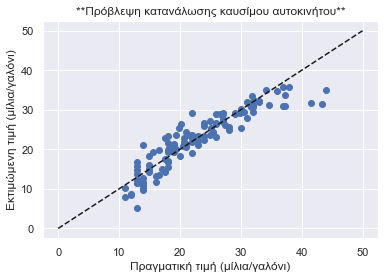

In [38]:
plt.scatter(y_test, y_pred_test)

plt.plot([0, 50], [0, 50], '--k')

plt.title('**Πρόβλεψη κατανάλωσης καυσίμου αυτοκινήτου**')
plt.xlabel('Πραγματική τιμή (μίλια/γαλόνι)')
plt.ylabel('Εκτιμώμενη τιμή (μίλια/γαλόνι)')
plt.show()

# Φτιάξε νέα μεταβλητή από τα υπάρχοντα δεδομένα

In [40]:
data['Power_to_weight']= ((data.horsepower*0.7457)/data.weight)

In [45]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Power_to_weight
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.025975
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.004425
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.015329
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.022982
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.025567
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.028398
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,0.054369


### Δώσε ονομα στη χώρα

In [42]:
data['country'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [44]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Power_to_weight,country
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.027666,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.033317,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.032554,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.032582,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.030269,USA
